In [2]:
import os

file_path = os.path.join(os.path.abspath('../scripts'), 'TelecomAnalysis_EDA.py')
if os.path.exists(file_path):
    print("File exists")
else:
    print(f"File does not exist at {file_path}")

File exists


In [3]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

from scripts.load_data import load_data_using_sqlalchemy
from scripts.TelecomAnalysis_EDA import Telecom_EDA

e:\10Academy\Telecom_DA\notebooks
e:\10Academy\Telecom_DA


In [4]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Import the necessary class
from scripts.TelecomAnalysis_EDA import Telecom_EDA

# Load the DataFrame (ensure the correct path to your CSV file)
df = pd.read_csv("E:/10Academy/Data02/telecom_data.csv")

# Initialize the analysis
analysis = Telecom_EDA(df)

# Now you can proceed with calling the methods on 'analysis' object, for example:
analysis.handle_missing_values()
analysis.handle_outliers()
print(analysis.describe_data())


<class 'pandas.core.frame.DataFrame'>
Index: 127925 entries, 62 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 127925 non-null  float64
 1   Start                                     127924 non-null  object 
 2   Start ms                                  127925 non-null  float64
 3   End                                       127924 non-null  object 
 4   End ms                                    127925 non-null  float64
 5   Dur. (ms)                                 127925 non-null  float64
 6   IMSI                                      127925 non-null  float64
 7   MSISDN/Number                             127925 non-null  float64
 8   IMEI                                      127925 non-null  float64
 9   Last Location Name                        126967 non-null  object 
 10  Avg RTT DL (ms)         

In [7]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [8]:
# Variable Transformation
decile_summary = analysis.variable_transformation()
print(decile_summary)

e:\10Academy\Telecom_DA\scripts\TelecomAnalysis_EDA.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, 'Total_Duration'] = self.df['Activity Duration DL (ms)'] + self.df['Activity Duration UL (ms)']


   Decile  Total_Duration
0       0    2.681878e+08
1       1    1.011013e+09
2       2    1.799874e+09
3       3    7.025099e+09
4       4    1.348095e+11


e:\10Academy\Telecom_DA\scripts\TelecomAnalysis_EDA.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, 'Decile'] = pd.qcut(self.df['Total_Duration'], 5, labels=False)


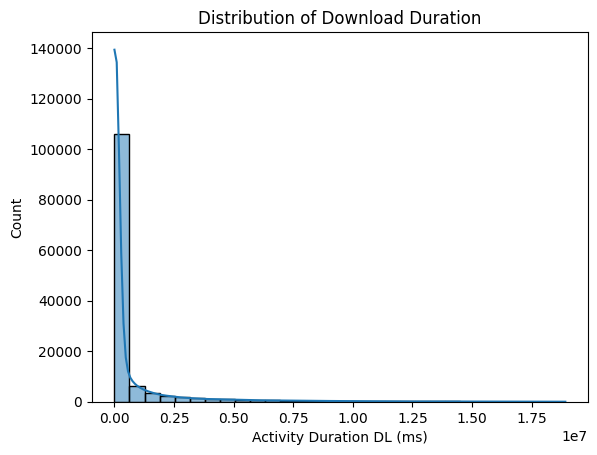

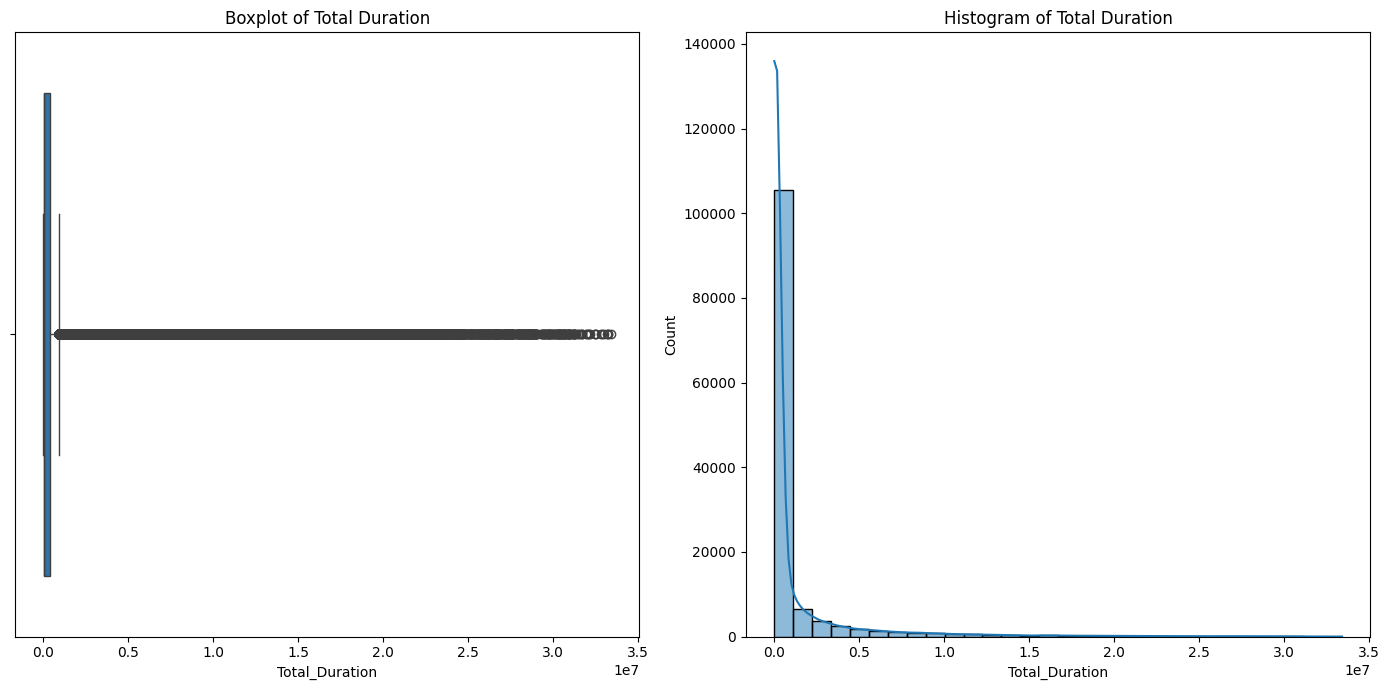

In [10]:
# Plotting Univariate Analysis
sns.histplot(analysis.df['Activity Duration DL (ms)'], bins=30, kde=True)
plt.title('Distribution of Download Duration')
plt.show()

# Calculate Total Duration if not already done
if 'Total_Duration' not in analysis.df.columns:
    analysis.df['Total_Duration'] = analysis.df['Activity Duration DL (ms)'] + analysis.df['Activity Duration UL (ms)']

# Plot Total Duration
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot for Total Duration
sns.boxplot(x=analysis.df['Total_Duration'], ax=axes[0])
axes[0].set_title('Boxplot of Total Duration')

# Histogram for Total Duration
sns.histplot(analysis.df['Total_Duration'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Total Duration')

plt.tight_layout()
plt.show()

In [11]:
# Bivariate Analysis
#sns.scatterplot(x='Social Media DL (Bytes)', y='Total DL (Bytes)', data=analysis.df)
#plt.title('Social Media Download Data vs Total Download Data')
#plt.xlabel('Social Media Download (Bytes)')
#plt.ylabel('Total Download (Bytes)')
#plt.show()


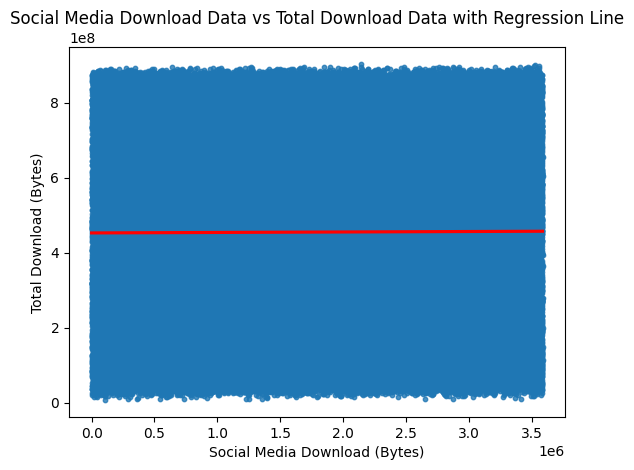

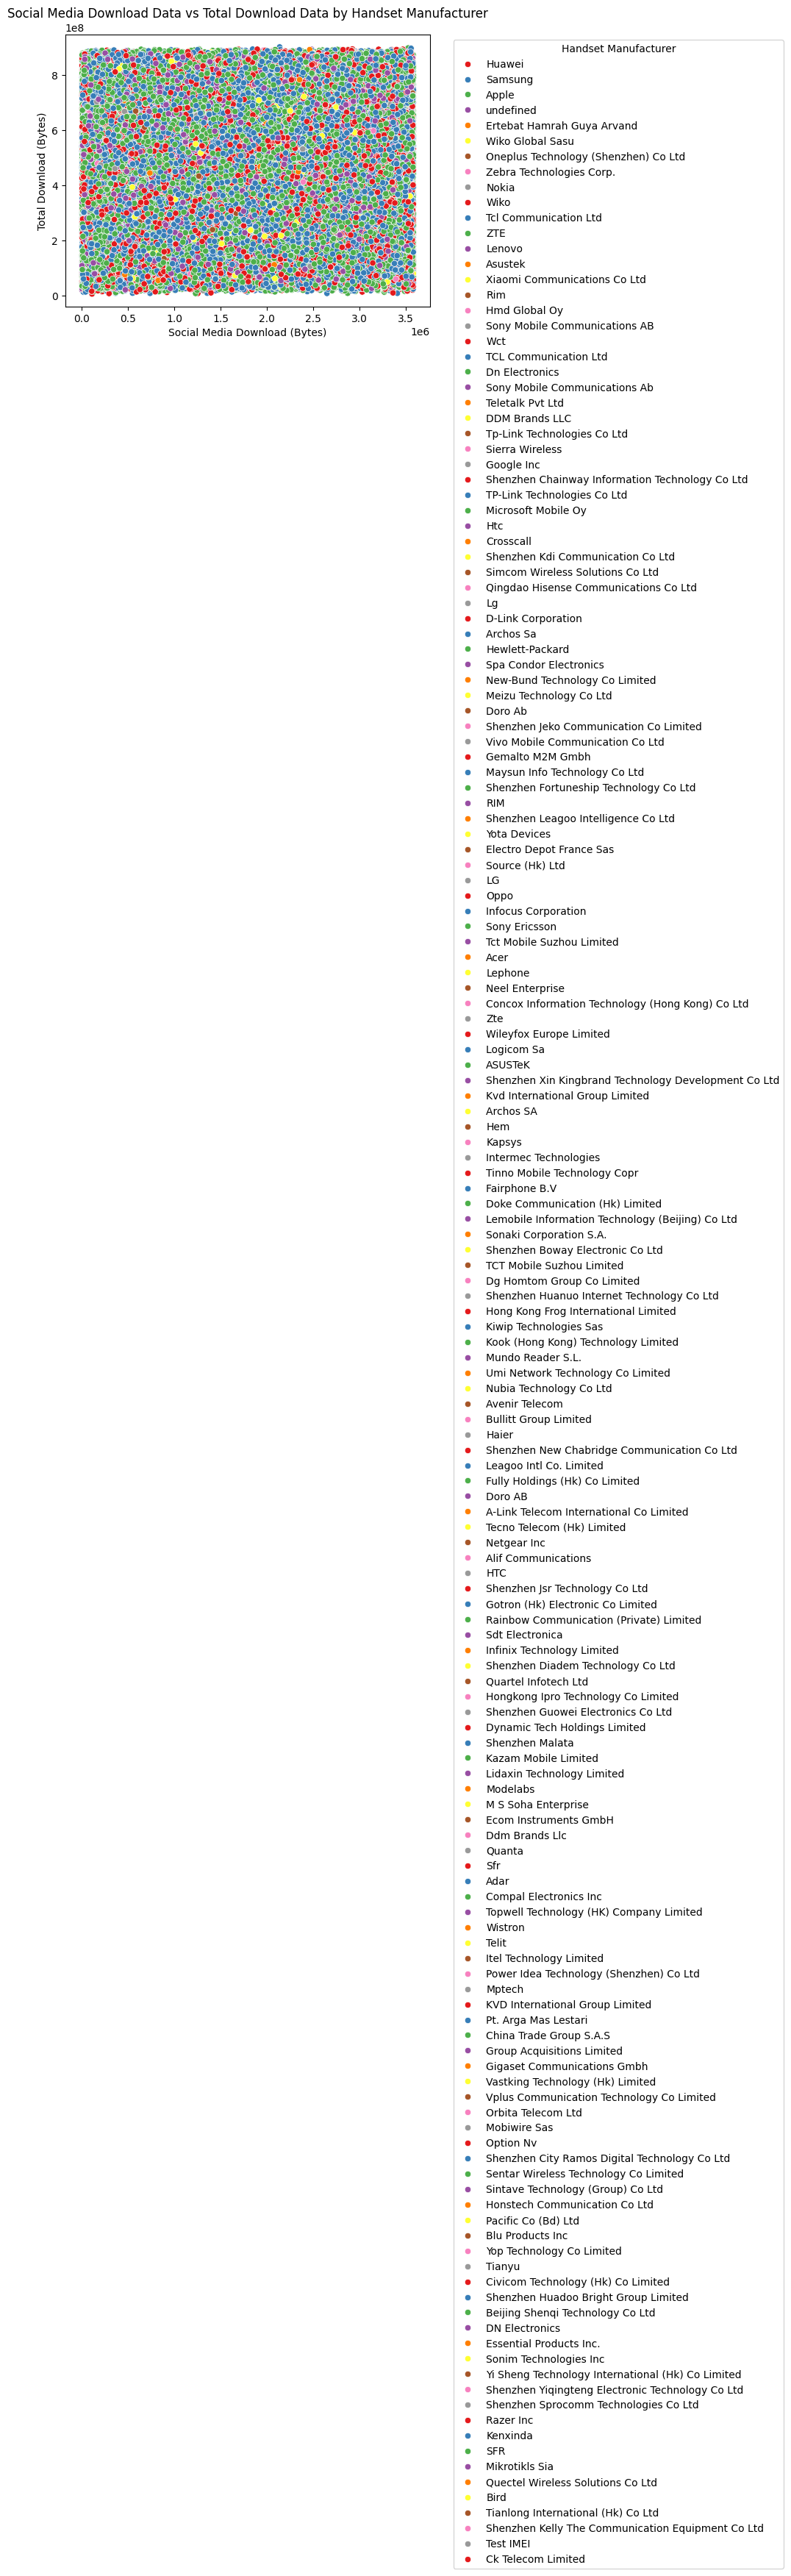

In [12]:
# Bivariate Analysis - Scatterplot with Regression Line
sns.regplot(x='Social Media DL (Bytes)', y='Total DL (Bytes)', data=analysis.df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Social Media Download Data vs Total Download Data with Regression Line')
plt.xlabel('Social Media Download (Bytes)')
plt.ylabel('Total Download (Bytes)')
plt.show()

# Bivariate Analysis - Scatterplot with Color by 'Handset Manufacturer' (Example)
sns.scatterplot(x='Social Media DL (Bytes)', y='Total DL (Bytes)', hue='Handset Manufacturer', palette='Set1', data=analysis.df)
plt.title('Social Media Download Data vs Total Download Data by Handset Manufacturer')
plt.xlabel('Social Media Download (Bytes)')
plt.ylabel('Total Download (Bytes)')
plt.legend(title='Handset Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

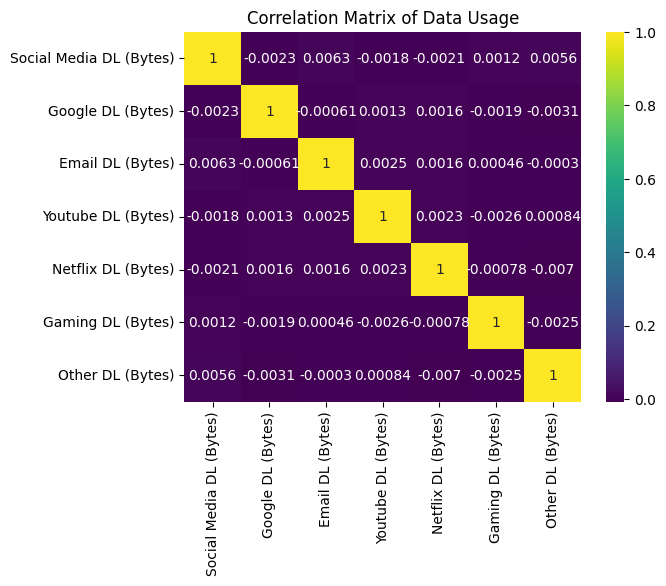

In [14]:
# Correlation Matrix
correlation_matrix = analysis.correlation_analysis()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Data Usage')
plt.show()

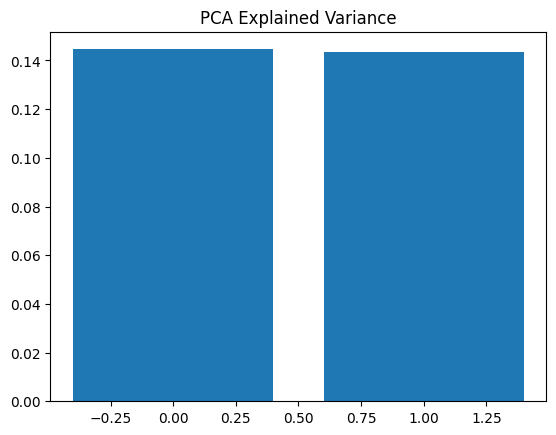

In [15]:
# PCA Visualization
principal_components = analysis.perform_pca()
plt.bar(range(len(principal_components)), principal_components)
plt.title('PCA Explained Variance')
plt.show()

In [16]:
# Identify the top 10 handsets used by customers
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [17]:
# Identify the top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [18]:
# Get the top 3 manufacturers
top_manufacturers_list = top_manufacturers.index

# Filter dataset for these manufacturers
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers_list)]

# Identify the top 5 handsets per top 3 manufacturer
top_handsets_per_manufacturer = (
    filtered_df.groupby('Handset Manufacturer')['Handset Type']
    .value_counts()
    .groupby(level=0).head(5)
)
print("Top 5 Handsets per Top 3 Handset Manufacturer:")
print(top_handsets_per_manufacturer)

Top 5 Handsets per Top 3 Handset Manufacturer:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Ga